# Classification with Scikit-Learn

This notebook is a walkthrough of different classification approaches provided by the Scikit-Learn library.

The dataset that we will use for this example was provided by the UCI Machine Learning Repository and can be found here: <a href="https://archive.ics.uci.edu/ml/datasets/Musk+(Version+2)">Musk (Version 2) Data Set</a>

## From the description:

### Data Set Information:

This dataset describes a set of 102 molecules of which 39 are judged by human experts to be musks and the remaining 63 molecules are judged to be non-musks. The goal is to learn to predict whether new molecules will be musks or non-musks. However, the 166 features that describe these molecules depend upon the exact shape, or conformation, of the molecule. Because bonds can rotate, a single molecule can adopt many different shapes. To generate this data set, all the low-energy conformations of the molecules were generated to produce 6,598 conformations. Then, a feature vector was extracted that describes each conformation. 

This many-to-one relationship between feature vectors and molecules is called the "multiple instance problem". When learning a classifier for this data, the classifier should classify a molecule as "musk" if ANY of its conformations is classified as a musk. A molecule should be classified as "non-musk" if NONE of its conformations is classified as a musk.


## Loading data

First we will load this data from the csv file into a Pandas dataframe and get a look at it.

You can see that by using a 0 based index, the features are in columns 3-168 and the class is in column 169.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

df = pd.read_csv("data/musk_csv.csv") 
# Preview the first 5 lines of the loaded data 
df.head()

In [ ]:
print("Total number of rows: %d" % len(df))
print("Breakdown by class:")
print(df.groupby('class').size())

## Training & Validation

Before we start looking at different methods for classification, we need to split this data into a training set and a validation set. The problem is that if we train using all of the data, we do not have an independent way of testing the accuracy of the model.

Luckily, scikit-learn provides an easy way to do this: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

First, we will slice the original dataframe to create a dataframe with only the 166 attributes, and another with only the classes.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,3:169]
y = df.iloc[:, 169]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25)

chance = 0.5 ** 10 * 100
print("Chance of hittings heads ten times in a row: " + str(chance))
print(y.mean())
print(ytrain.mean())



## Classifier Testing Approach

Now that we have the data ready for training and validation, we can start working through the different classifiers provided by scikit-learn. To do that, we will look at two primary measurements of each classifier:
1. Accuracy - what percentage of the overal set did the model classify correctly
2. Confusion Matrix - which classes were classified correctly, and which were classified as the opposite

Here is a great write-up for a [Confusion Matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

A good place to start for finding a list of classifiers is [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


## Support Vector Machine

The first classifier that we will look at is the [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

This can be used with several different kernel types. We will start with the default 'rbf'

In [ ]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");


## Support Vector Machine

Next we will try the linear classifier. Note - this takes a long time...

CPU times: user 2h 15min 33s, sys: 97.1 ms, total: 2h 15min 34s
Wall time: 2h 15min 33s
Accuracy: 0.949697

Confusion Matrix: 
[[1366   54]
 [  29  201]]



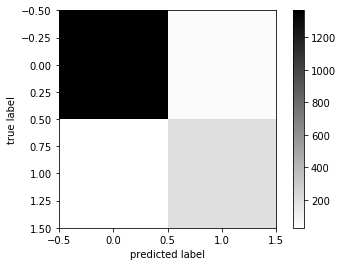

In [39]:
# from sklearn.svm import SVC  # "Support Vector Classifier"
# clf = SVC(kernel='linear', gamma='scale')
# %time clf.fit(Xtrain, ytrain)
# ypred = clf.predict(Xtest)
# print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

# confusion_matrix = metrics.confusion_matrix(ypred, ytest)
# print("Confusion Matrix: ")
# print(confusion_matrix)
# print()

# plt.imshow(confusion_matrix,
#            interpolation='nearest', cmap=plt.cm.binary)
# plt.grid(False)
# plt.colorbar()
# plt.xlabel("predicted label")
# plt.ylabel("true label");


## Decision Tree Classifier

The next classifier that we will look at is the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
ypred = dtc.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");


## Random Forest Classifier

The next classifier that we will look at is the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(Xtrain, ytrain)
ypred = rfc.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## AdaBoost Classifier

How about an [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0)
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## Gaussian Naive Bayes

Did someone say "[Gaussian Naive Bays](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)"?

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## QuadraticDiscriminantAnalysis

Everyone's favorite - [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xtrain, ytrain)
ypred = qda.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## K-Nearest Neighbors

Will you be my [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)?


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(Xtrain, ytrain)
ypred = knc.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## Multi-Layer Perceptron Classifier

We can't have AI without [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(Xtrain, ytrain)
ypred = mlp.predict(Xtest)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## Dimensionality Reduction

Do we really need 166 attributes to be able to classify molecules as MUSK / NON-MUSK?

Are any of these attributes dependent on others?

We can use [Primary Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to give us a bit more information. First let's look at the explained variance ratio of the attributes (components) across the entire dataframe.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can also use PCA to reduce the component count while keeping a percentage of the variance. The next step shows that 95% of the variance can be kept with only 35 components.

In [ ]:
pca = PCA(0.95) # keep 95% of variance
Xtotal_xform = pca.fit_transform(X)
Xtrain_xform = pca.fit_transform(Xtrain)
Xtest_xform = pca.transform(Xtest)
print(X.shape)
print(Xtotal_xform.shape)
print("95% of the variance can be represented by "+ str((Xtrain_xform.shape[1] / X.shape[1] * 100)) + "% of the original components count!")

## Classification with Dimensionality Reduction

Now let's try repeating the classification exercise with the reduced dimensionality dataframe.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain_xform, ytrain)
ypred = dtc.predict(Xtest_xform)
print("Accuracy: %f\n" % metrics.accuracy_score(ypred, ytest))

confusion_matrix = metrics.confusion_matrix(ypred, ytest)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

plt.imshow(confusion_matrix,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");


## K-Fold Validation

Initially, we have been splitting the data into a 75% training set and a 25% testing set by random sampling. This is commonly called "Cross-validation". 

From [Machine Learning Mastery](https://machinelearningmastery.com/k-fold-cross-validation/):
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

An additional approach is known as k-Fold Validation:
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

In [ ]:
# 2-fold cross-validation
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

In [ ]:
print(SVC(kernel='rbf', gamma='scale').fit(X2, y2).score(X1, y1))
print(SVC(kernel='rbf', gamma='scale').fit(X1, y1).score(X2, y2))

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(SVC(kernel='rbf', gamma='scale'), X, y, cv=2)
cv.mean()

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5)

    # train_scores = result[0]
    # valid_scores = result[1]
    title = "Learning Curves ("+ type(estimator).__name__ + ")"
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(GaussianNB())
# plot_learning_curve(SVC())
plot_learning_curve(DecisionTreeClassifier())
plot_learning_curve(RandomForestClassifier(n_estimators=100))
plot_learning_curve(AdaBoostClassifier())
plot_learning_curve(QuadraticDiscriminantAnalysis())
# plot_learning_curve(KNeighborsClassifier())